In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC

In [12]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.1, 0.01, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 0.01, 1, 10],
        'gamma': [0.1, 0.01, 1, 10]
    }
]

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5)

In [15]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.01, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 0.01, 1, 10], 'gamma': [0.1, 0.01, 1, 10],
                          'kernel': ['rbf']}],
             verbose=5)

In [16]:
estimator.best_estimator_

SVC(C=0.01, kernel='linear')

In [17]:
model = estimator.best_estimator_

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [20]:
accuracy_score(y_test, y_pred)

0.958041958041958

In [21]:
confusion_matrix(y_test, y_pred)

array([[48,  5],
       [ 1, 89]])

In [22]:
f1_score(y_test, y_pred)

0.967391304347826

In [23]:
y_train_pred = model.predict(X_train)

In [24]:
accuracy_score(y_train, y_train_pred)

0.9812206572769953

In [25]:
confusion_matrix(y_train, y_train_pred)

array([[151,   8],
       [  0, 267]])

In [26]:
f1_score(y_train, y_train_pred)

0.985239852398524

In [27]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [28]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [29]:
y = f(X[:,0], X[:,1])

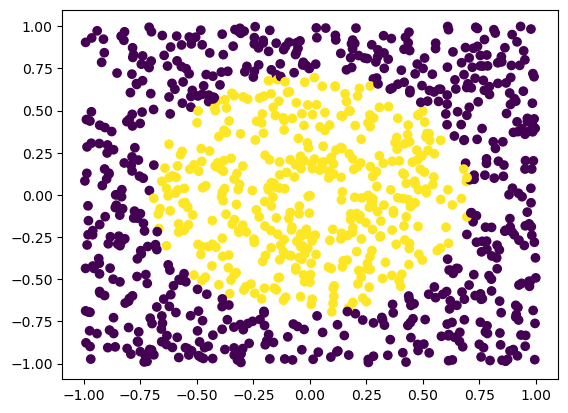

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [31]:
model = SVC(kernel='rbf')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [33]:
model.fit(X_train, y_train)

SVC()

In [34]:
# .... confusion_matrix : train, test
# .... accuracy_score   : train, test
# .... f1_score         : train, test

In [35]:
print(f'Broj potpornih vektora: {model.n_support_}')

Broj potpornih vektora: [80 78]


In [36]:
print(f'Indeksi instanci koji su potporni vekotir: {model.support_}')

Indeksi instanci koji su potporni vekotir: [ 20  22  48  60  63  77  81  88  89  99 119 121 123 126 134 144 148 150
 181 196 200 214 216 218 237 242 247 251 255 268 289 291 293 306 317 318
 340 342 359 362 373 384 385 388 393 423 425 432 435 436 439 442 448 455
 473 474 484 497 504 523 534 542 558 568 571 580 586 613 634 648 662 678
 681 693 709 718 721 729 742 746  15  23  26  50  53  62  70  90  97 101
 105 107 109 129 143 147 176 178 184 257 260 263 269 271 280 282 305 307
 308 322 330 333 344 352 365 379 382 396 397 406 407 415 416 422 433 437
 440 457 460 466 470 510 515 516 539 546 554 560 569 572 574 581 588 602
 607 622 623 625 637 659 667 668 673 694 698 708 720 722]


In [37]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[ 0.43724426 -0.59931805]
 [ 0.3660398  -0.64908116]
 [ 0.68325233  0.32619293]
 [ 0.71501545 -0.10527839]
 [ 0.44699559 -0.65476038]
 [-0.68993032  0.17647679]
 [-0.22053105 -0.73830836]
 [ 0.1850417   0.75461703]
 [-0.73113912 -0.21377552]
 [ 0.6693324   0.41662957]
 [-0.67674167 -0.32404479]
 [-0.02146862  0.77171141]
 [ 0.46096919 -0.64504539]
 [ 0.44274575  0.61928519]
 [-0.6177427   0.47986558]
 [-0.45579978 -0.58874791]
 [ 0.73684374 -0.12345697]
 [-0.49487707  0.58623809]
 [ 0.29552252  0.6924582 ]
 [ 0.16198589  0.74106708]
 [-0.02927114  0.78579817]
 [-0.42289856  0.57625188]
 [-0.12891114  0.70147491]
 [-0.5564085  -0.46697111]
 [-0.13076686  0.77627032]
 [-0.54846972 -0.51479093]
 [ 0.72206392 -0.15924072]
 [ 0.44243087  0.60527411]
 [ 0.6889716   0.1878149 ]
 [-0.3882224  -0.66187786]
 [-0.57109416 -0.50530028]
 [-0.42738029  0.56877721]
 [ 0.62364056 -0.4477959 ]
 [ 0.71212966 -0.10689926]
 [ 0.16599856 -0.69104193]
 [-0.70967427  0.02565049]
 [-0.

In [38]:
np.size(model.support_vectors_)

316

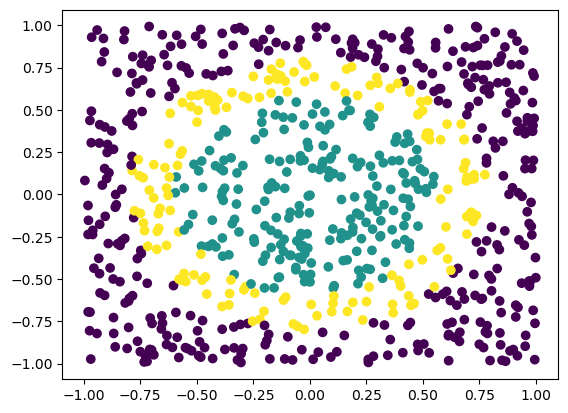

In [39]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()